# Homework

[//]: # "##### Write a Julia function of the bisection method that has the following specifications.

- The function name has to be `bisection_a`. (So that TA can test your code by simply pasting a test code to your homework.)

- An example of its usage is: `bisection_a(f, -1, 2, 1e-6, 10)`
   - `f` is the name of a function to be subjected for root-finding,   
   - `-1` is the lower bound of the initial bracket,
   - `2` is the upper bound of the initial bracket,
   - `1e-6` is the convergence criterion,
   - `10` is the maximum number of iterations.
   
- It should check whether the initial bracket contains the root.   
   
- If it hits the maximum number of iterations before convergence, it should print the result from the last iteration with an informative error message.

-  Consider the function $f(x) = x^3 + 4x^2 - 10$. 
  - Plot the function using `Plots`.
  - Use `bisection_a` to find the root of $f(x)$."






## The following `bisection` is a Julia program for root finding using the bisection method.
- Add comments to places marked by `##` to explain the lines.
  - For instance (a silly example): `iter=1   ## starts the iteration count`.
  - Your comments should be more extensive than what you normally do for your own code, because the purpose is to see if you understand the purpose of the code.
-  Consider the function $f(x) = x^3 + 4x^2 - 10$. 
  - Plot the function using the `Plots` package.
  - Use `bisection` to find the root of $f(x)$.  

In [10]:
function bisection(f::Function,a,b,eps,imax)
    
    f(a)f(b)<0 || throw("The ($a, $b) does not contain the solution.")  ##如果區間內沒有root，回傳錯誤訊息
    
    iter=1                           
    p=0.0      
    while iter<=imax                  ##限制最大迭代次數
        p = a+(b-a)/2                 ##取區段中點   
        if f(p)==0 || abs(a-b)<eps    ##確認區段終點是否為根或足夠接近根
            return println("p is $p and the iteration number is $iter")
        end      
    
        f(a)f(p)<0 ? b=p : a=p        ##依勘根定理決定下一次用[a:p]或[[p:b]迭代
        
        iter += 1
    end
    y=f(p)                            ##計算最後一次迭代的值   
    println("Maximum number of iterations is researched and the method did not converge. The last iteration gives $p with function value $y")   ##無法收斂則回傳最後一次的p
end


bisection (generic function with 1 method)

p is 1.365203857421875 and the iteration number is 16


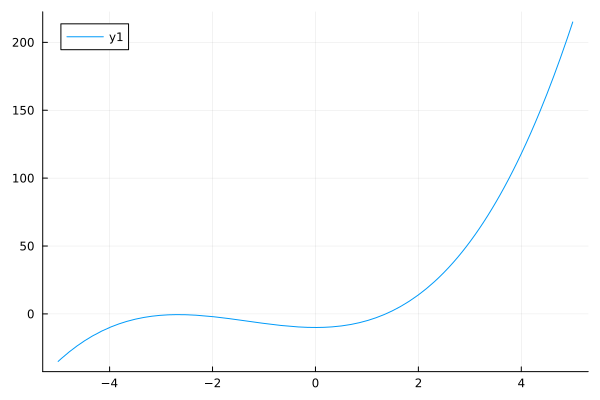

In [15]:
using Plots
f(x) = x^3+4*x^2-10

bisection(f,0,2,0.0001, 10000)
plot(f)

## Suppose you are dealing with functions that have multiple roots such as the `h(x)` given below.  In general, it is not possible to find all the roots for such functions without further information. Nevertheless, if the roots are reasonably spaced apart (e.g., the distance between them is much larger than the error tolerance used in checking convergence), we could find the roots that fall in a given interval $[a, b]$.

- Use the package `Plots` to plot the function $h(x) = 0.1 + \sin(x) + \cos(x) - 0.01x^3$ for $x$ in the range of $[-10, 10]$. 
  - The graph is to give you an idea of what multiple roots mean.

- Modify `bisection` so that it can deal with functions that have multiple roots in the range of $[a,b]$.  Name the function `bisection_b`.
  - Hint: You may start from one end of the bracket, find the first root, use it to find the next one.
  - The function should not be tailored to $h(x)$ given above. It should be general enough for other multiple-roots functions.

- Suppose you are given the function $h(x) = 0.1 + \sin(x) + \cos(x) - 0.01x^3$ and you are NOT allowed to plot the function for inspection. The only information you have is that it has multiple roots in $[-7,7]$. Use `bisection_b` to find the roots of $h(x)$.

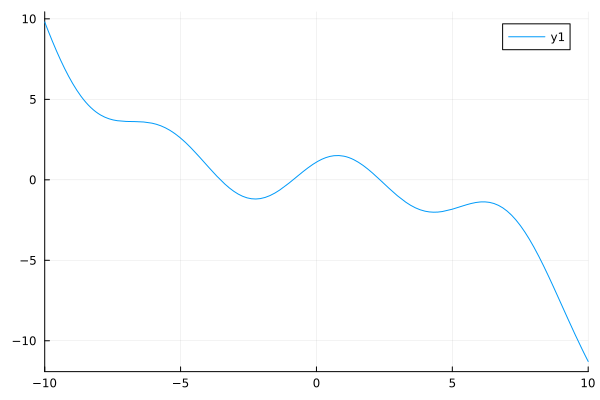

In [16]:
h(x) = 0.1 +sin(x)+cos(x)-0.01*x^3
plot(h,xlim=(-10,10))

In [34]:
#將[a,b]切成數個區段，分別找根，並再分成更小的區段，如前後迭代找到的數量一樣就停止，不一樣則繼續迭代。

function bisection_b(f::Function,a,b,eps,imax,rmin) #rmin = minimum range of section.
    rmin > eps       || throw("rmin must greater than eps.")
    rmin < (b - a)/10 || throw("rmin must smaller than (b - a)/10.")
    plist = []
    range = (b - a)/10
    prevP = 0
    curP = 0
    while range >= rmin                    #Iterate with different range(different amount of sections).
        curP = 0
        
        for i in a:range:b-range           #Iterate in each section.
            c = i   
            d = i + range
            iter = 1
            p = 0.0
            
            while iter<=imax && f(c)f(d)<0                  
                p = c + (d - c)/2 
                if f(p)==0 || abs(c-d)<eps
                    push!(plist,p)
                    curP += 1
                    break
                end   
                f(c)f(p)<0 ? d=p : c=p        
                iter += 1
            end 
            
        end
        
        if curP == prevP #Check
            break        #if
        else             #amount of p 
            empty!(plist)#equals
            prevP = curP #to
            range /= 10  #last
        end              #iteration.
        
    end
    
    print("Roots:\n")    #Print all p.
    for i in plist  
        print(i,"\n")
    end
    
end

h(x) = 0.1 +sin(x)+cos(x)-0.01*x^3
bisection_b(h,-7,7,0.00001, 10000, 0.014)



Roots:
-3.5341241455078127
-0.8606915283203129
2.3366900634765613
